In [17]:
import stat_helper
import hdf_helper
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [18]:
df = hdf_helper.h5_to_df('demo.hdf')

In [19]:
std = df.std(axis = 0)
std['ch_0']

199.01103771447984

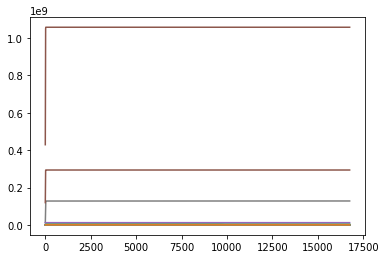

In [20]:
for channel in df.columns:
    df[channel] = gaussian_filter1d(df[channel].to_numpy(), 6)

plt.plot(df)

In [21]:
first_quartiles = df.quantile(q = 0.25, axis = 0)
third_quartiles = df.quantile(q = 0.75, axis = 0)
iqr = third_quartiles - first_quartiles

df.loc[df > third_quartiles + 1.5 * iqr, np.NAN] = np.NAN
df.loc[df < first_quartiles - 1.5 * iqr, np.NAN] = np.NAN

df

# non_outliers = df.loc[(df >= first_quartiles - 1.5 * iqr) & (df <= third_quartiles + 1.5 * iqr)]

KeyError: "None of [Index([          ('c', 'h', '_', '0'),           ('c', 'h', '_', '1'),\n            ('c', 'h', '_', '1', '0'), ('c', 'h', '_', '1', '0', '0'),\n       ('c', 'h', '_', '1', '0', '1'), ('c', 'h', '_', '1', '0', '2'),\n       ('c', 'h', '_', '1', '0', '3'), ('c', 'h', '_', '1', '0', '4'),\n       ('c', 'h', '_', '1', '0', '5'), ('c', 'h', '_', '1', '0', '6'),\n       ...\n            ('c', 'h', '_', '9', '0'),      ('c', 'h', '_', '9', '1'),\n            ('c', 'h', '_', '9', '2'),      ('c', 'h', '_', '9', '3'),\n            ('c', 'h', '_', '9', '4'),      ('c', 'h', '_', '9', '5'),\n            ('c', 'h', '_', '9', '6'),      ('c', 'h', '_', '9', '7'),\n            ('c', 'h', '_', '9', '8'),      ('c', 'h', '_', '9', '9')],\n      dtype='object', length=142)] are in the [index]"